# Wafer Fault Detection

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

# Problem Statement


**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/sensor2/main/notebooks/wafer_23012020_041211.csv",index_col=0)

In [4]:
data

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,0.0090,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,0.0071,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,-0.0031,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,-0.0194,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1


In [5]:
data.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


# Checking that data Imbalanced or not

In [6]:
data['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

From the above information we can see that the data is highly imbalanced

# Checking For Missing Values

In [7]:
data['Good/Bad'].isna().sum()

0

No target datapoint is missing

In [8]:
data.isna().sum().sum()

2306

Total of 2306 datapoints as missing

# Visualiation

In [9]:
# understanding enumrate
mylist = [10,20,30,40]
for i, col in enumerate(mylist):
  print("Index:",i,"Value",col)

Index: 0 Value 10
Index: 1 Value 20
Index: 2 Value 30
Index: 3 Value 40


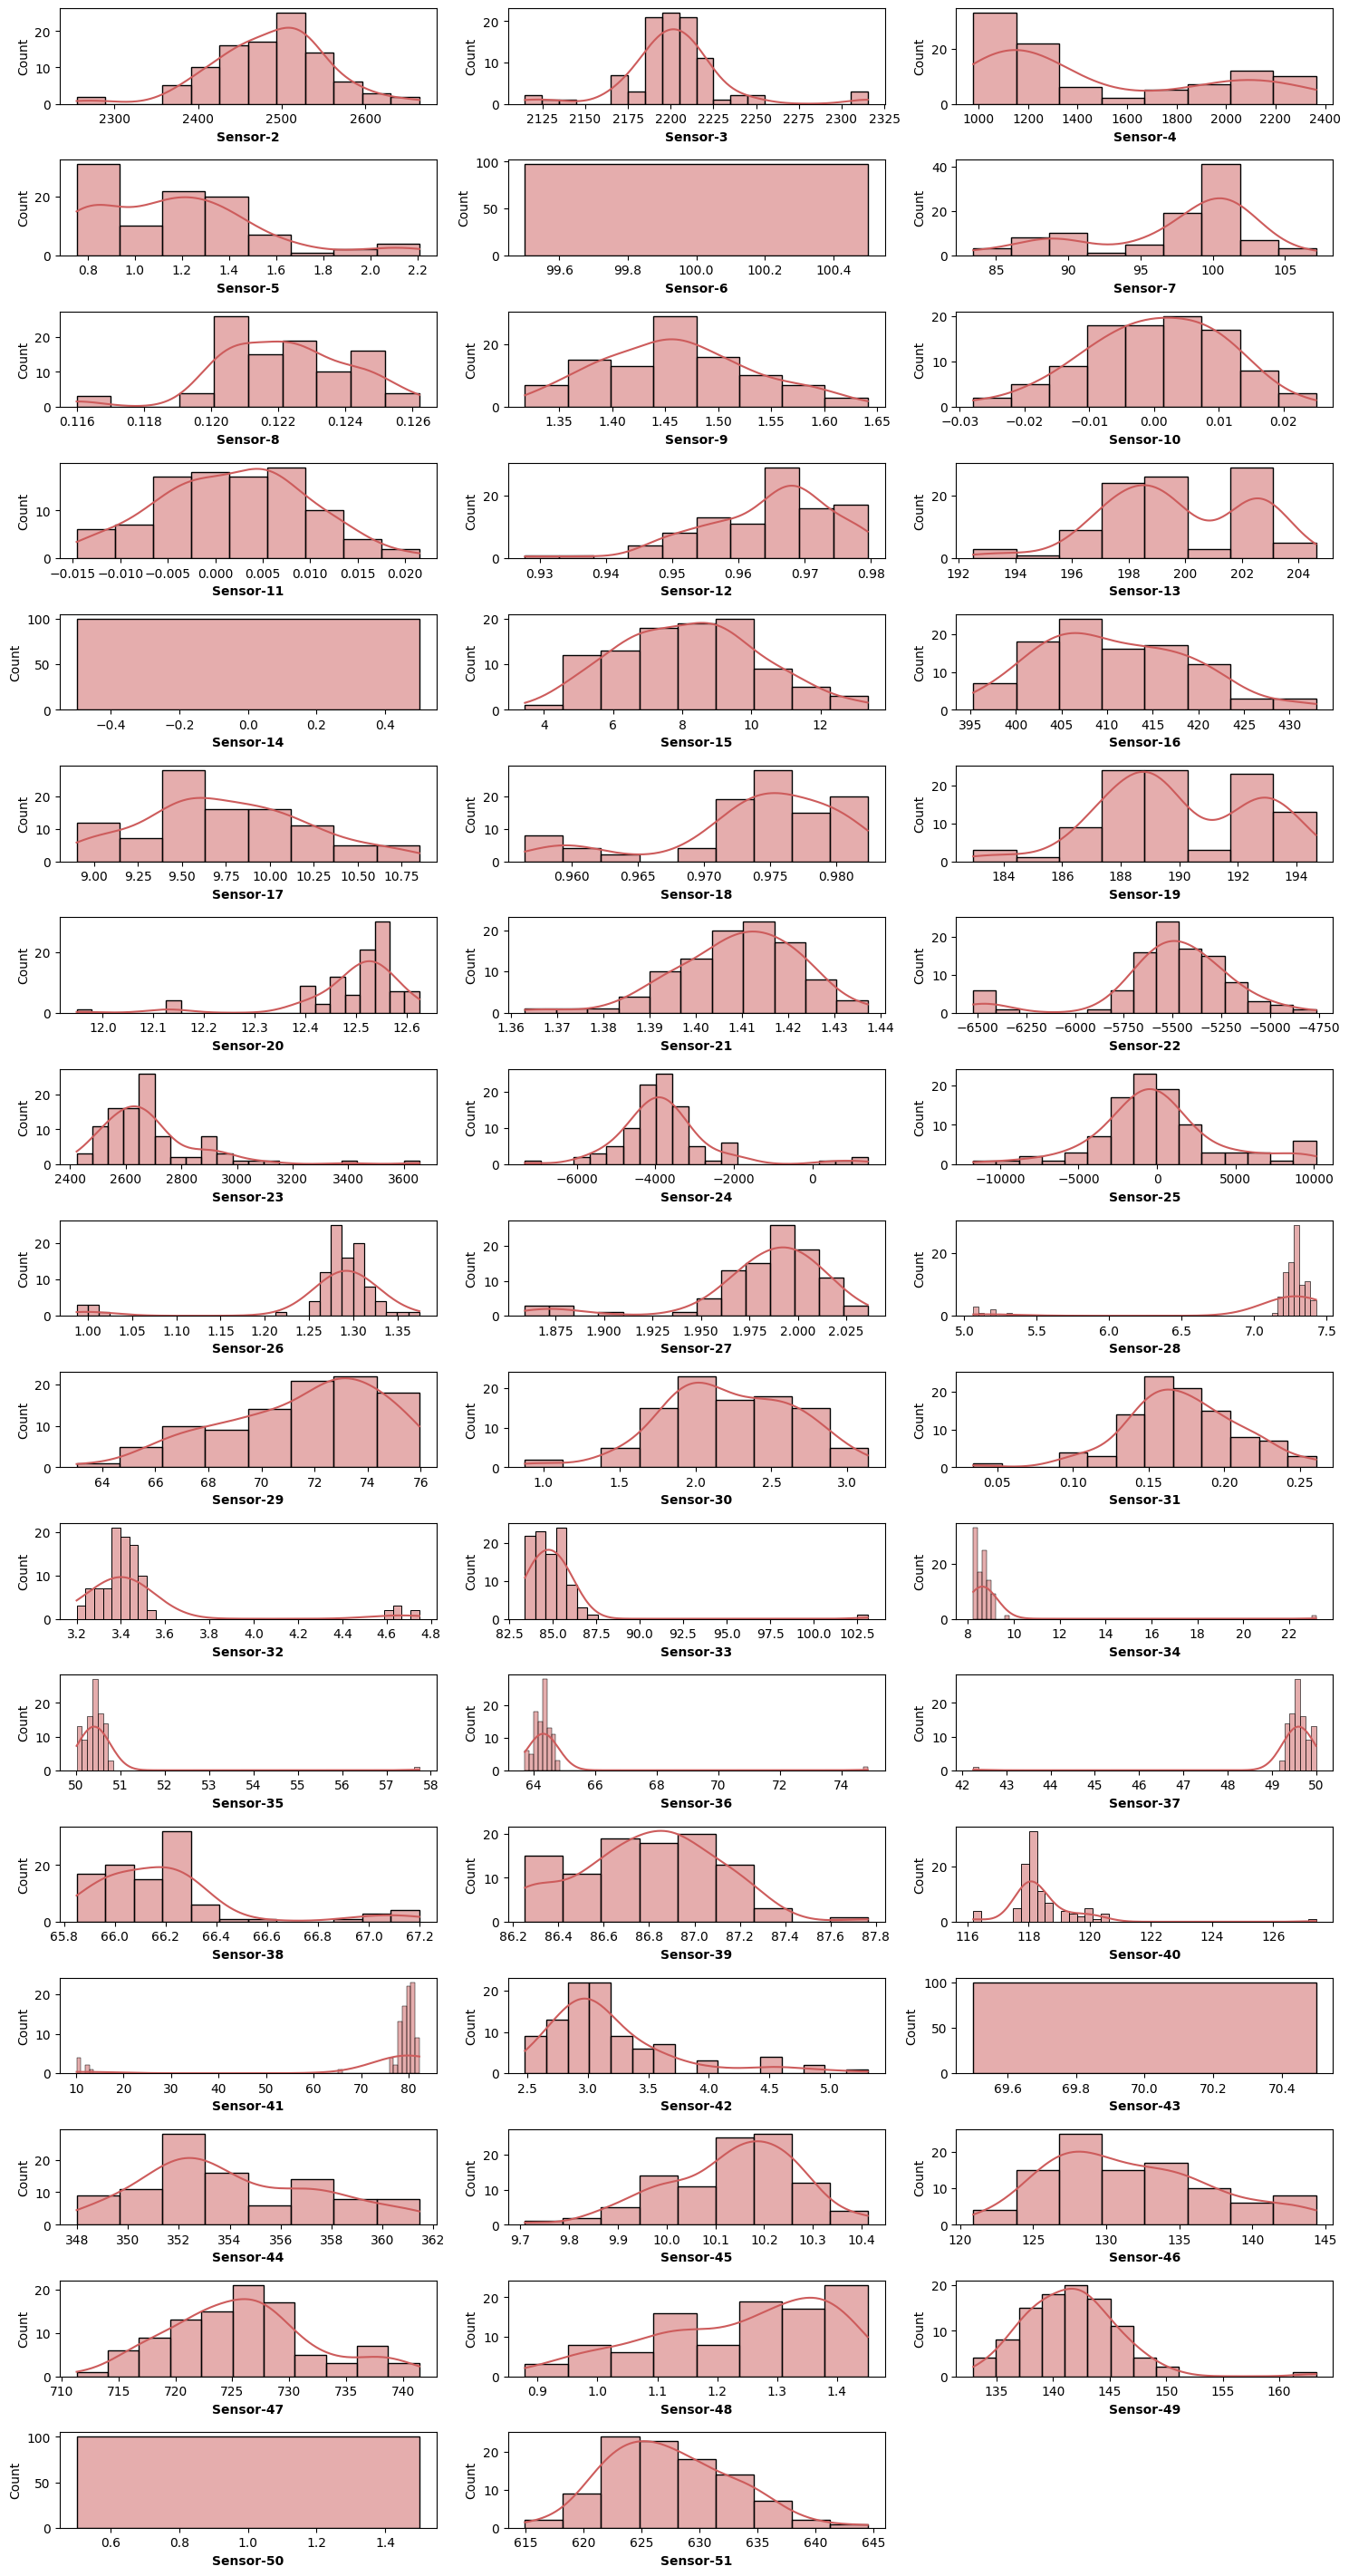

In [11]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(data.columns[1:51]):
  plt.subplot(60, 3, i+1)
  sns.histplot(x=data[col], color='indianred',kde=True)
  plt.xlabel(col, weight='bold')
  plt.tight_layout()

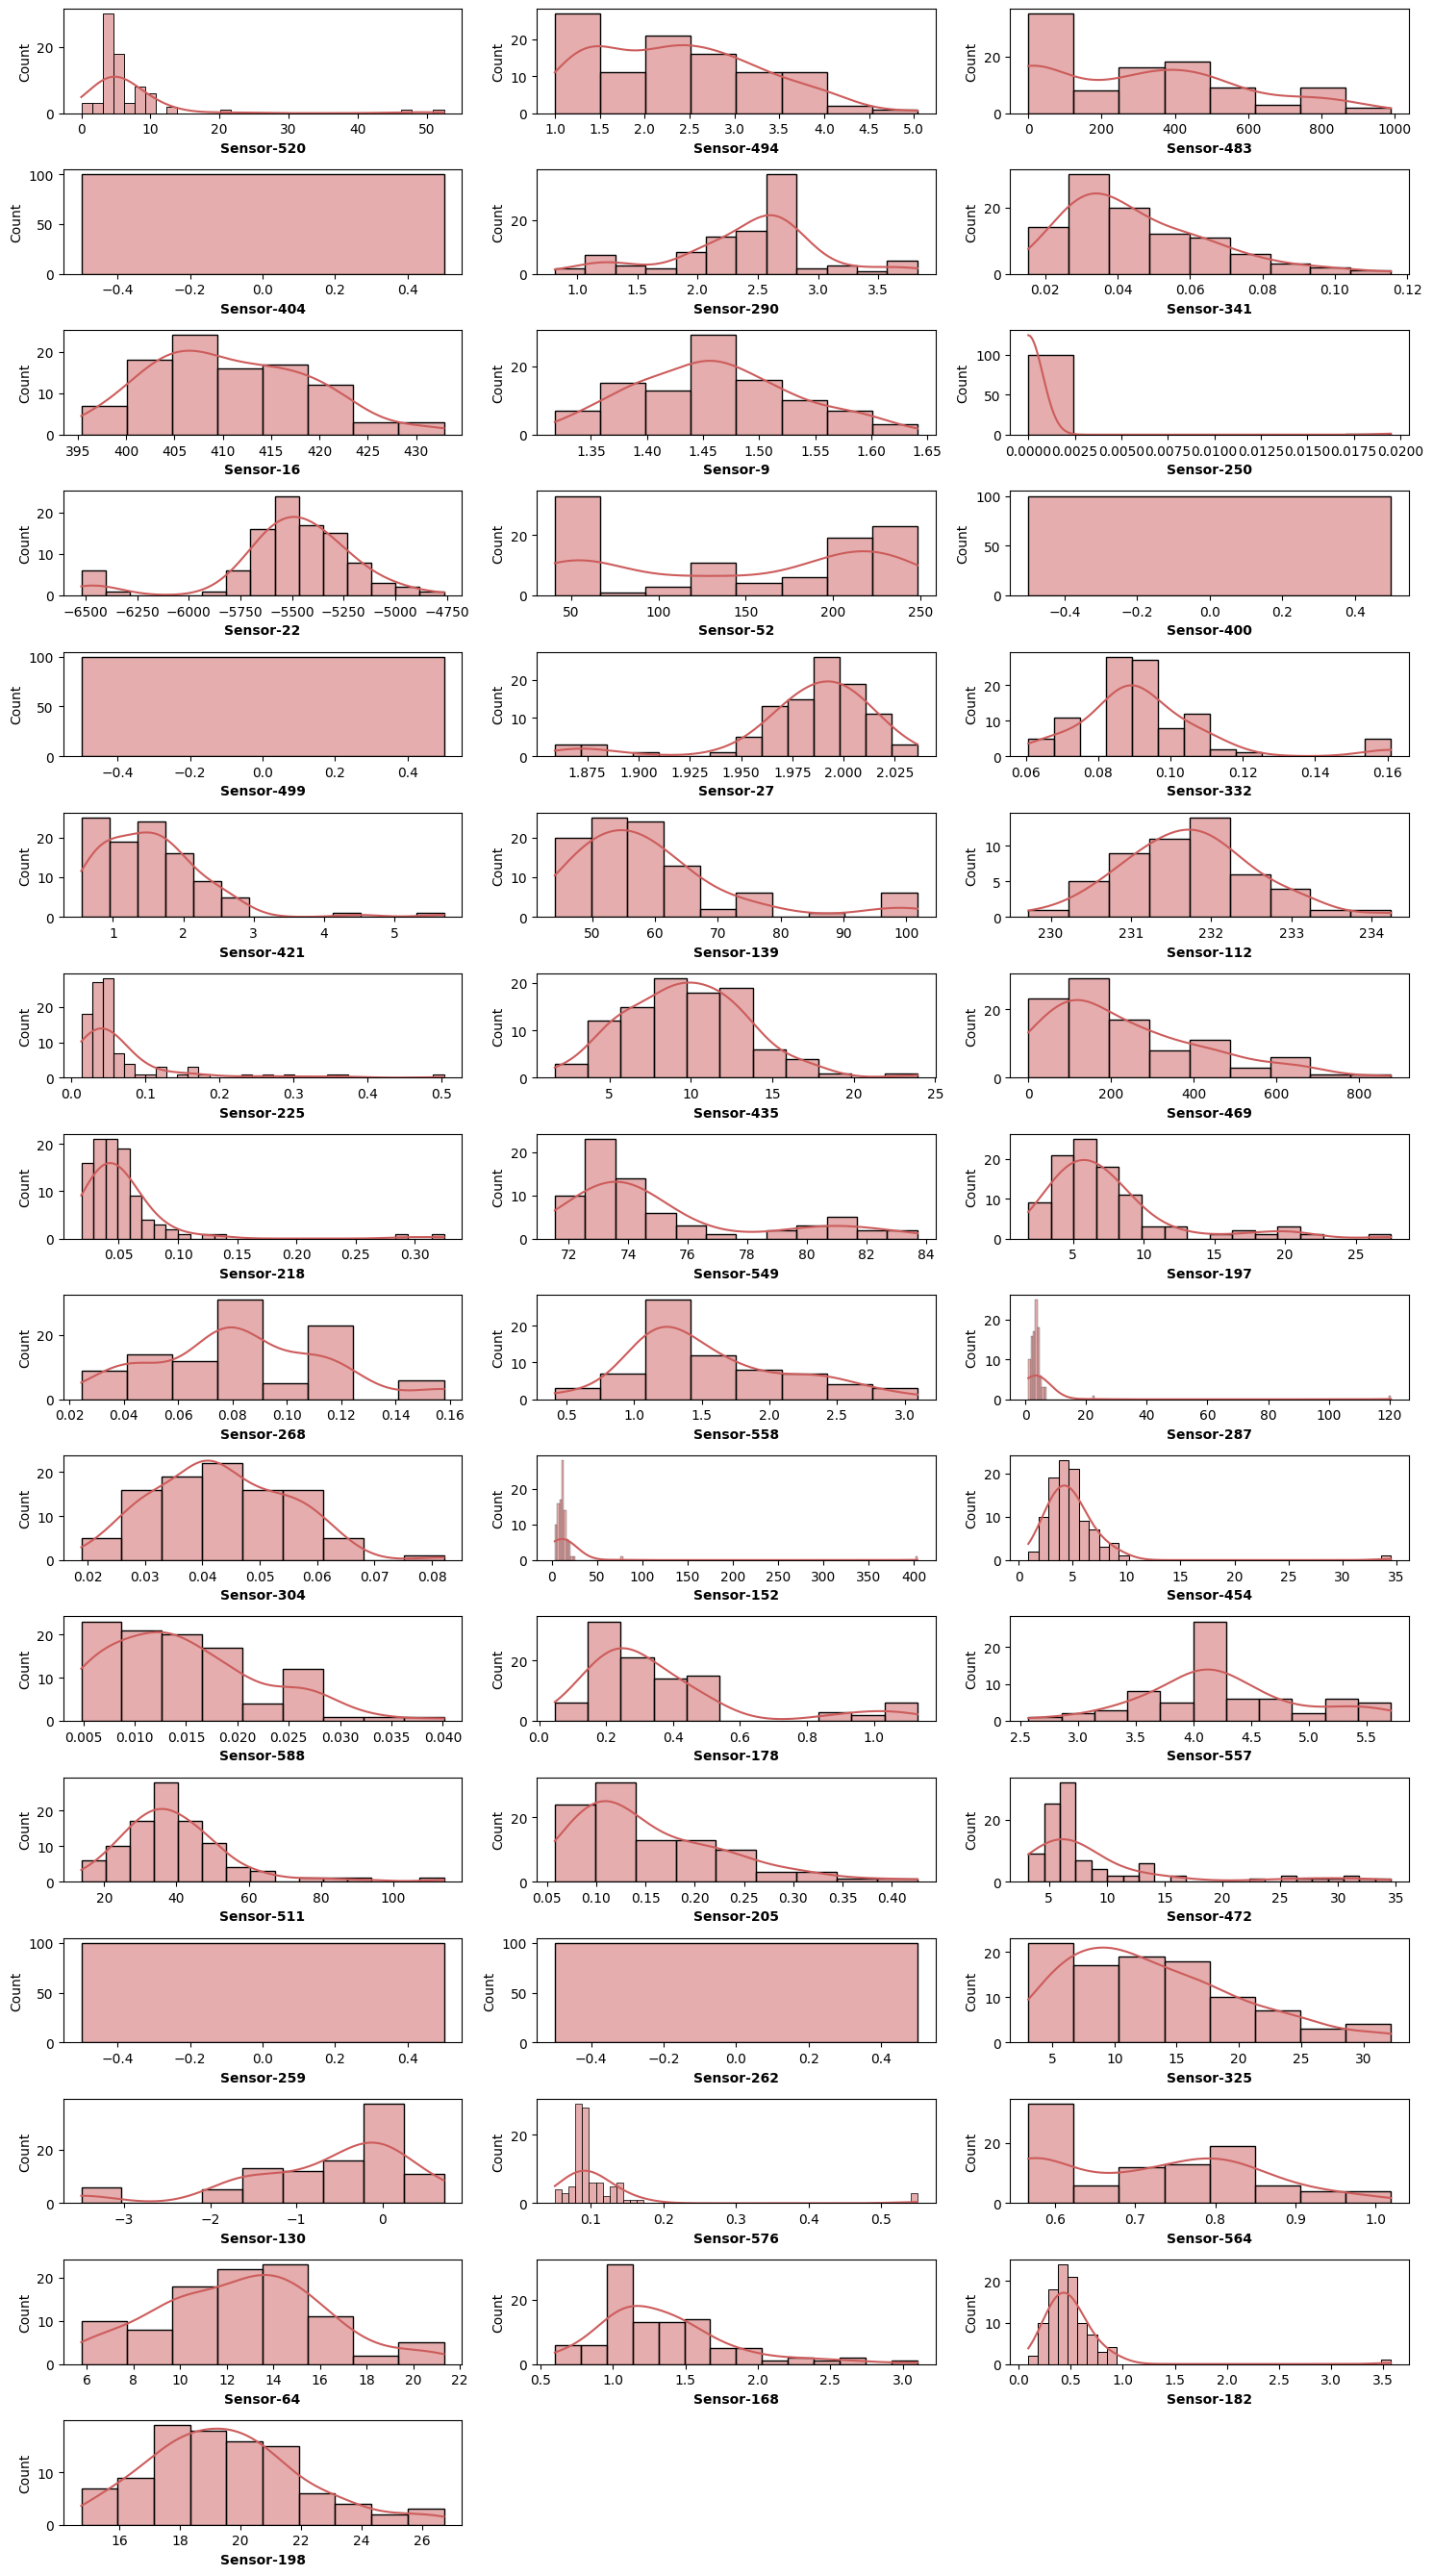

In [15]:
random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

plt.figure(figsize=(15, 100))

for i, col in enumerate(data.columns[random_50_sensors_idx]):
  plt.subplot(60, 3, i+1)
  sns.histplot(x=data[col], color='indianred',kde=True)
  plt.xlabel(col, weight='bold')
  plt.tight_layout()

### Insight:
Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling.

For the features with 0 standard deviation, we can straight away drop them and for others that do have outliers, we gotta go ahead with the Robust Scaling.

# Droping Columns

In [21]:
def get_cols_with_zero_std(df:pd.DataFrame ) -> list[str]:
  """
  Return the columns name with the standard deviation as zero
  """

  col_to_drop = []
  num_cols = df.select_dtypes(exclude=['object'])
  for i in num_cols:
    if(df[i].std() == 0):
      col_to_drop.append(i)
  
  return col_to_drop

def get_redundant_cols(df: pd.DataFrame , missing_thres=0.7) -> list[str]:
  """
  Return the list of columns having missing value more than thresh
  """

  cols_missing_ratios = df.isna().sum().div(df.shape[0])
  cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thres].index)
  return cols_to_drop  


In [19]:
# data.shape[0] => number of rows
data.isna().sum().div(data.shape[0])

Sensor-1      0.01
Sensor-2      0.00
Sensor-3      0.03
Sensor-4      0.03
Sensor-5      0.03
              ... 
Sensor-587    0.00
Sensor-588    0.00
Sensor-589    0.00
Sensor-590    0.00
Good/Bad      0.00
Length: 591, dtype: float64

In [22]:
# Cols with more than 70% missing value
missing_col_name = get_redundant_cols(df=data, missing_thres=0.7)
missing_col_name

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [23]:
# Cols with zero std()
zero_std_col = get_cols_with_zero_std(df=data)
zero_std_col

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [24]:
# Cols to drop
col_to_drop = missing_col_name + zero_std_col

In [25]:
col_to_drop.append('Good/Bad')

# Seprate Features and Label out

In [27]:
X, y = data.drop(columns=col_to_drop) , data[['Good/Bad']]

In [28]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.5978,0.1217,1.5337,0.0090,0.0058,...,NaN,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176
Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,90.1144,0.1160,1.4695,0.0071,0.0215,...,NaN,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176
Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3603,-0.0031,0.0086,...,NaN,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176
Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,1.4493,-0.0194,-0.0018,...,NaN,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176


In [29]:
y

,Good/Bad
Wafer-801,-1
Wafer-802,1
Wafer-803,-1
Wafer-804,-1
Wafer-805,-1
...,...
Wafer-896,-1
Wafer-897,1
Wafer-898,-1
Wafer-899,-1


# Creating pipepline

In [30]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

nums_cols = X.columns # Because every column in numerical

num_pipepline = Pipeline(
  steps=[
    ('imputer',KNNImputer(n_neighbors=3)),
    ('scaler',RobustScaler())
  ]
)

num_pipepline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [31]:
X_trans = num_pipepline.fit_transform(X)
print(f"The Shape of feature set is : {X_trans.shape}")
X_trans

The Shape of feature set is : (100, 464)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.46272494,
         0.515625  , -0.40093   ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.93573265,
        -0.671875  , -0.44021198]])

# Solving the problem of imbalancelness

In [32]:
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy='auto')
X_res , y_res = resampler.fit_resample(X_trans,y)

In [33]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)


In [34]:
y_res.value_counts()

Good/Bad
-1          94
 1          94
Name: count, dtype: int64

# Train test split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3)
print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((131, 464), (131, 1))
test set: ((57, 464), (57, 1))


# Model Training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [37]:
def display_scores(scores:list[float]):
  print(f"Scores of the model is : {scores}")
  print(f"Mean Score of the model  is : {scores.mean()}")
  print(f"Standard Deviation of the score of  modelis : {scores.std()}")

In [38]:
svc_cross = cross_val_score(SVC(),X_train,y_train['Good/Bad'],scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [39]:
display_scores(svc_cross)

Scores of the model is : [1.         1.         1.         1.         1.         1.
 1.         1.         0.97619048 1.        ]
Mean Score of the model  is : 0.9976190476190476
Standard Deviation of the score of  modelis : 0.0071428571428571175


In [40]:
random_cross = cross_val_score(RandomForestClassifier(),X_train,y_train['Good/Bad'],scoring='roc_auc',cv=10,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [41]:
display_scores(random_cross)

Scores of the model is : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score of the model  is : 1.0
Standard Deviation of the score of  modelis : 0.0


In [42]:
logistic_cross = cross_val_score(LogisticRegression(),X_train,y_train['Good/Bad'],scoring='roc_auc',cv=10,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [43]:
display_scores(logistic_cross)

Scores of the model is : [0.85714286 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Score of the model  is : 0.9857142857142858
Standard Deviation of the score of  modelis : 0.04285714285714284


# Selecting Random Forest

In [44]:
model = RandomForestClassifier()
model.fit(X_train,y_train['Good/Bad'])
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy score of the model is : {accuracy_score(y_pred=y_pred, y_true=y_test)}")
print(f"Confusion Matrix of the model is : \n{confusion_matrix(y_pred=y_pred, y_true=y_test)}")

Accuracy score of the model is : 1.0
Confusion Matrix of the model is : 
[[25  0]
 [ 0 32]]
